In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
data_dir="Dataset"
categories=["bluecrown passion flower","cyclamen persicum","echinacea angustifolia","garden nasturtium","lotus","nuragica columbine","nymphaea loriana","philodendron gloriosum","spear thistle","tillandsia lagensis"]

In [29]:
training_data=[]
img_size=100
def create_training_data():
  for c in categories:
    path=os.path.join(data_dir,c)
    print(path)
    class_num=categories.index(c)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_training_data()

Dataset\bluecrown passion flower
Dataset\cyclamen persicum
Dataset\echinacea angustifolia
Dataset\garden nasturtium
Dataset\lotus
Dataset\nuragica columbine
Dataset\nymphaea loriana
Dataset\philodendron gloriosum
Dataset\spear thistle
Dataset\tillandsia lagensis


In [30]:
print(len(training_data))
np.shape(training_data[0][0])

1225


(100, 100, 3)

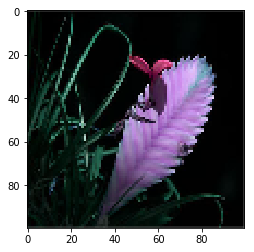

In [31]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1224][0])

In [32]:
import random
random.shuffle(training_data)
x_train=[]
y_train=[]
x_test=[]
y_test=[]
c=0
for image,classes in training_data:
  if(c<225):
    x_test.append(image)
    y_test.append(classes)
    c=c+1
    continue
  x_train.append(image)
  y_train.append(classes)

In [4]:
from sklearn.externals import joblib 
model = joblib.load('xyz.pkl') 

TypeError: Unexpected keyword argument passed to optimizer: learning_rate

### Loading the model


In [11]:
import keras
#x_train=np.array(x_train)
#x_test=np.array(x_test)
num_classes=10
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
from keras.models import load_model
model = load_model('model.h5')
model.summary()
#score = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1]) 

TypeError: Unexpected keyword argument passed to optimizer: learning_rate

### Predicting on a flower

0.9992211
flower is  bluecrown passion flower
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


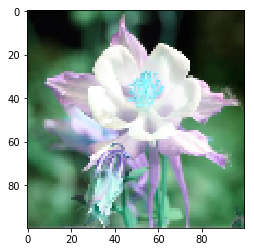

In [36]:
import matplotlib.pyplot as plt
img1=x_test[100]
img = np.reshape(img1,[1,100,100,3])
#print(model.predict(img))
k=model.predict(img)
max=np.amax(k)
print(max)
number=list(np.where(k==max))
p=int(number[1])
print("flower is ",categories[p])
print(y_test[100])

plt.imshow(img1)

# Webcam Capture

In [43]:
import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    cv2.imshow("test", frame)
    if not ret:
        break
    k = cv2.waitKey(1)

    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...IMAGE CAPTURED SUCCESSFULLY")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "r_x{}.jpg".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
        break

cam.release()

cv2.destroyAllWindows()

test_real=cv2.imread('r_x0.png')
real_time_image=np.reshape(np.array(cv2.resize(cv2.imread('r_x0.jpg'),(100,100))),[1,100,100,3])
k=model.predict(real_time_image)
#print(k)
max=np.amax(k)
#print(max)
number=list(np.where(k==max))
p=int(number[1])
#print("flower is ",categories[p])

r_x0.jpg written!
[[2.43187501e-11 6.37276543e-08 3.20038375e-12 1.68252532e-12
  9.99984860e-01 6.59467897e-11 1.50172118e-05 1.36206851e-10
  1.17583885e-11 2.10768264e-10]]
0.99998486
flower is  lotus


## Medicinal value of the flower

In [44]:
from bs4 import BeautifulSoup
import requests
medic={"bluecrown passion flower":"Passion Flower","lotus":"Indian Lotus","echinacea angustifolia":"Echinacea","spear thistle":"Milk Thistle"}
en_status={"bluecrown passion flower":"https://www.iucnredlist.org/species/179504/1580872","cyclamen persicum":"https://www.iucnredlist.org/species/135016/4052882","echinacea angustifolia":"https://www.iucnredlist.org/species/117909851/123324018","garden nasturtium":"https://www.iucnredlist.org/species/88503701/88503805","lotus":"https://www.iucnredlist.org/species/164281/1038562","nuragica columbine":"https://www.iucnredlist.org/species/61672/12520091","nymphaea loriana":"https://www.iucnredlist.org/species/81359075/81360324","philodendron gloriosum":"https://www.iucnredlist.org/species/129739546/129739550","spear thistle":"https://www.iucnredlist.org/species/22702200/93864664","tillandsia lagensis":"https://www.iucnredlist.org/species/182043/136070708"}
medic_value=str()


def remove_href_and_replacewith_children(tag):
    for a in tag.findAll('a'):
        a.replaceWithChildren()

if categories[p] in medic:
    plantName=medic[categories[p]]
    API_URL = "http://www.remedieshouse.com/herbs/15-beautiful-flowering-plants-with-medicinal-uses/"
    page_response = requests.get(API_URL)
    #html parsing
    page_content = BeautifulSoup(page_response.content, "html.parser")
    #grabbing the data
    content = page_content.find_all("div", {'class': 'entry-content clearfix'})
    plantToDescriptionDict = {}
    #plantName = input("Enter the name of plant you want to know info about:\n")
    for tag in content:
        hTags = tag.find_all("h3")
        #print(hTags)
        remove_href_and_replacewith_children(tag)
        paraTags = tag.find_all("p")
        #print(paraTags)
        hc = 0
        for index in range(len(paraTags)):
            if not paraTags[index].find("img") and index != 0:
                plantToDescriptionDict[hTags[hc].text.lower()] = paraTags[index].text
                hc = hc + 1
    print(plantToDescriptionDict[plantName.lower()])
    medic_value=str(plantToDescriptionDict[plantName.lower()])
else:
    print("No information Available")
    medic_value="No information Available"


Indian Lotus is a aquatic plant and the national flower of India. All parts of lotus flower are edible and its flowers, leaves and seeds have been used in Ayurveda for diarrhea, cholera and fever.


# Endangered Status

In [50]:
from bs4 import BeautifulSoup
from selenium import webdriver
driver = webdriver.Chrome()
en_status={"bluecrown passion flower":"https://www.iucnredlist.org/species/179504/1580872","cyclamen persicum":"https://www.iucnredlist.org/species/135016/4052882","echinacea angustifolia":"https://www.iucnredlist.org/species/117909851/123324018","garden nasturtium":"https://www.iucnredlist.org/species/88503701/88503805","lotus":"https://www.iucnredlist.org/species/164281/1038562","nuragica columbine":"https://www.iucnredlist.org/species/61672/12520091","nymphaea loriana":"https://www.iucnredlist.org/species/81359075/81360324","philodendron gloriosum":"https://www.iucnredlist.org/species/129739546/129739550","spear thistle":"https://www.iucnredlist.org/species/22702200/93864664","tillandsia lagensis":"https://www.iucnredlist.org/species/182043/136070708"}
url = en_status[categories[p]]
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()
Endangered_status=str()
count=0
for i in soup.find_all("p", {"class": "card__data card__data--key card__data--accent"}):
    count+=1
    if(count==7):
        j=i.find("strong")
        print(j.text)
        Endangered_status=str(j.text)
        

Least Concern


In [16]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.iucnredlist.org/species/164281/1038562#assessment-information')
driver.save_screenshot("screenshot.png")
driver.close()

In [29]:
import pytesseract
from PIL import Image 

pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img=Image.open('screenshot.png')
text=pytesseract.image_to_string(img)
text=str(text)
print(text)

PM EY Ny G Assessment Information (eee aac Sra ate) ea) & Habitat and Ecology ML}

VUE MCL) © Conservation Actions 39 Bibliography MMe Clag [ee 1) ee LE

   

B Assessment Information

 

IUCN RED LIST CATEGORY AND CRITERIA ASSESSMENT LANGUAGE

Least Concern English

ver 3.1
DATE ASSESSED

23 May 2018

YEAR PUBLISHED

2018

 

> Assessment Information in detail

© Geographic Range

 

NATIVE
7 Evtant 2 Intrachicad fracidant)


## favourable conditions

In [4]:
import pandas as pd
categories1=["bluecrown_passion_flower","cyclamen_persicum","echinacea_angustifolia","garden_nasturtium","lotus","nuragica_columbine","nymphaea_loriana","philodendron_gloriosum","spear_thistle","tillandsia_lagensis"]
dict={}
df1 = pd.DataFrame({"Sun Needs": [], "Soil Needs": [],"Height":[]})
mod_name = categories1[1]
with open("fav_cond.txt","r+") as f3:
    for lines in f3:
        if mod_name in lines:
            details = lines.split()
            dict = {"Sun Needs": [details[1]], "Soil Needs": [details[2]],"Height":[details[3]]}
            df2 = pd.DataFrame(dict)
            df1 = df1.append(df2)
print(df1)
print(mod_name)

           Sun Needs Soil Needs        Height
0  cyclamen_persicum      shade  well-drained
cyclamen_persicum
